#  <u>*Auto Mobile Analysis .*</u>

## <u>*Analysis objective*</u>
### *To predict the Auto Mobile Prices based on given features inputs*

---

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import json

## *Importing data*

In [68]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/DataSet/automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## *Data shape*

In [69]:
df.shape

(205, 26)

## *Data info*

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

---

## *Data Cleaning*

*A. colums names cleaning: (converting all to small letters and add "_" in spaces between words)*

In [71]:
import janitor
df=df.clean_names()

*B. Replaing "?" symbol with nan-value :*

In [72]:
df=df.replace("?",np.nan)

*C. na-values :*

In [73]:
print(f"The total number of na values are {df.isna().sum().sum()}")
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na values are 59

The number of na-values in each features are :


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

*-- We will replce the NA Values wuth randomly selcted values for the same dataset*

In [74]:
from feature_engine.imputation import RandomSampleImputer
rand_imput=RandomSampleImputer(seeding_method="add")
rand_imput.fit(df)
rand_imput.transform(df)
df=rand_imput.transform(df)

*D. converting features into desired Data Type:*

In [75]:
df=df.infer_objects()
df[["normalized_losses","horsepower","peak_rpm","price"]]=df[["normalized_losses","horsepower","peak_rpm","price"]].astype("int64")
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float64")

---

*Saving the new cleaned dataset*

In [76]:
df.to_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/DataSet/new_cleaned_df.csv", index=False)

## *Exploratory Data Analysis - EDA*

*A. categorical & numerical_features:*

In [77]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [78]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 16 numerical features : ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
we have 10 categorical features : ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


*B. Basic data statistics:*

* *Numerical data statistics :*

In [79]:
pd.DataFrame(numerical_features).describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized_losses,205.0,122.268293,35.371851,65.00,94.00,115.00,150.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.328488,0.273836,2.54,3.15,3.31,3.59,3.94
stroke,205.0,3.254732,0.315308,2.07,3.11,3.29,3.41,4.17


* *Categorical data statistics :*

In [80]:
pd.DataFrame(categorical_features).describe().T

,count,unique,top,freq
make,205,22,toyota,32
fuel_type,205,2,gas,185
aspiration,205,2,std,168
num_of_doors,205,2,four,115
body_style,205,5,sedan,96
drive_wheels,205,3,fwd,120
engine_location,205,2,front,202
engine_type,205,7,ohc,148
num_of_cylinders,205,7,four,159
fuel_system,205,8,mpfi,94


*C. EDA - Data Visualization:*

* *Numerical features Visualization :*

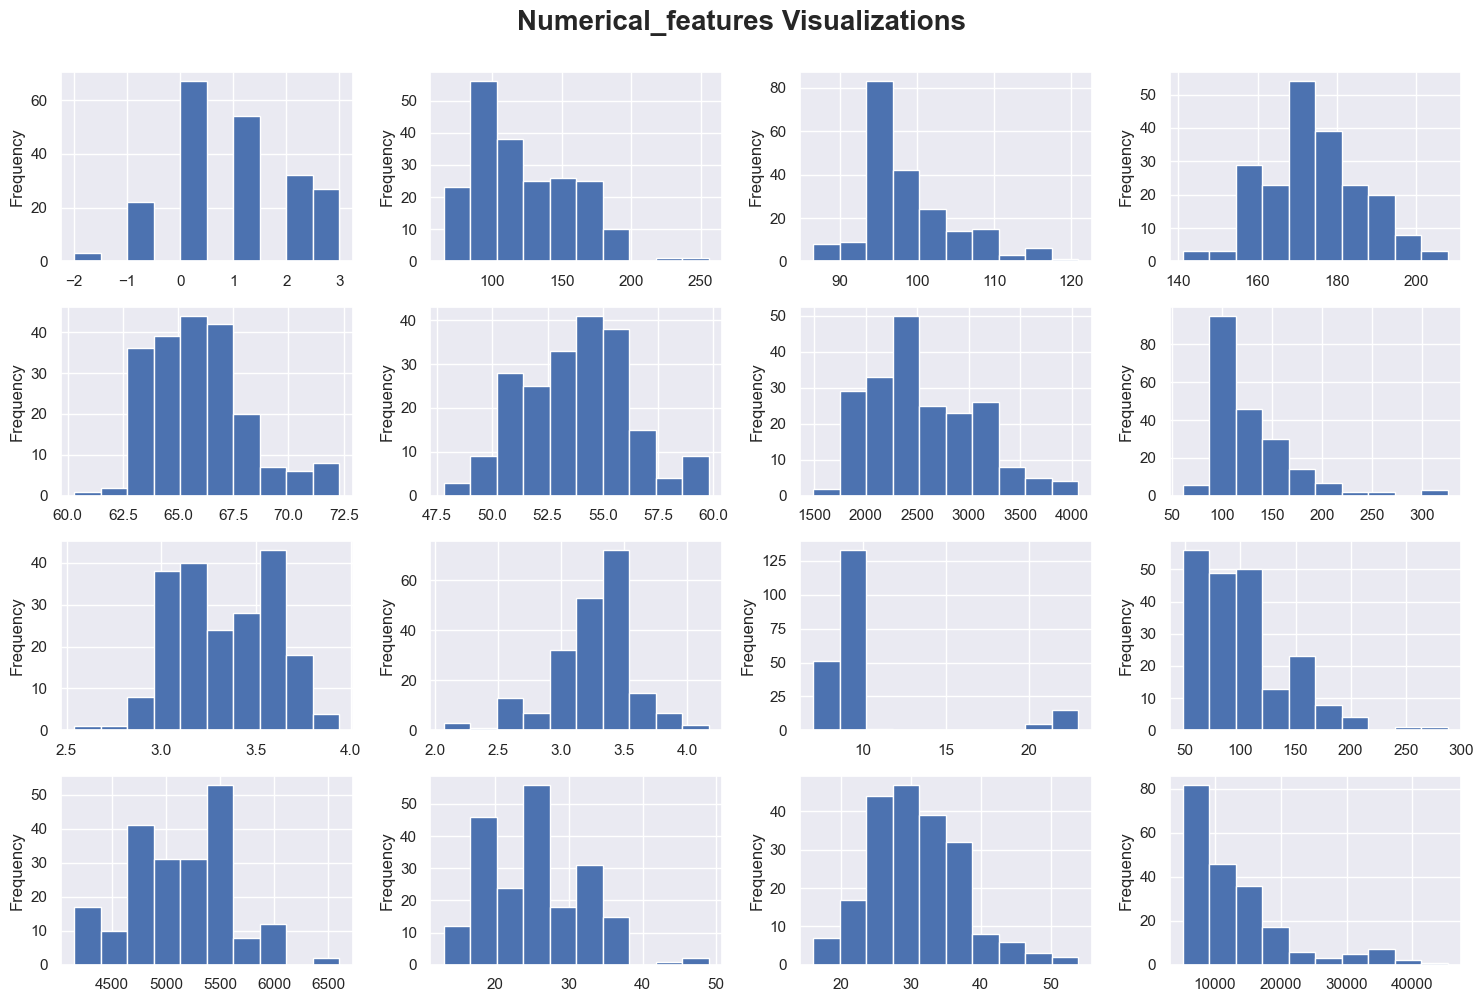

In [15]:
# creating one function for plotting numerical_features
def plot_numerical_features(numerical_features):
    nrows = 4
    ncols = 4

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))
    fig.suptitle(f"Numerical_features Visualizations",fontsize=20,fontweight="bold",y=1.)
    
    axes = axes.flatten()

    for i, column in enumerate(numerical_features.columns):
        if i >= nrows * ncols:
            break 
        numerical_features[column].plot(ax=axes[i], kind="hist")
        plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/NumericalFeaturesGrapths/plot_Numerical_Features.png',dpi=500);

    plt.tight_layout()
    plt.show()
    
plot_numerical_features(numerical_features)

 * *we can see that some faetures looks like it has outliers except (sympoling,bore,height,curb_wieght)  features, but when we have a close look at these data points we can see that these points are not close to the 4th quantule range and not extremnly vary*

* *Categorical features Visualization :*

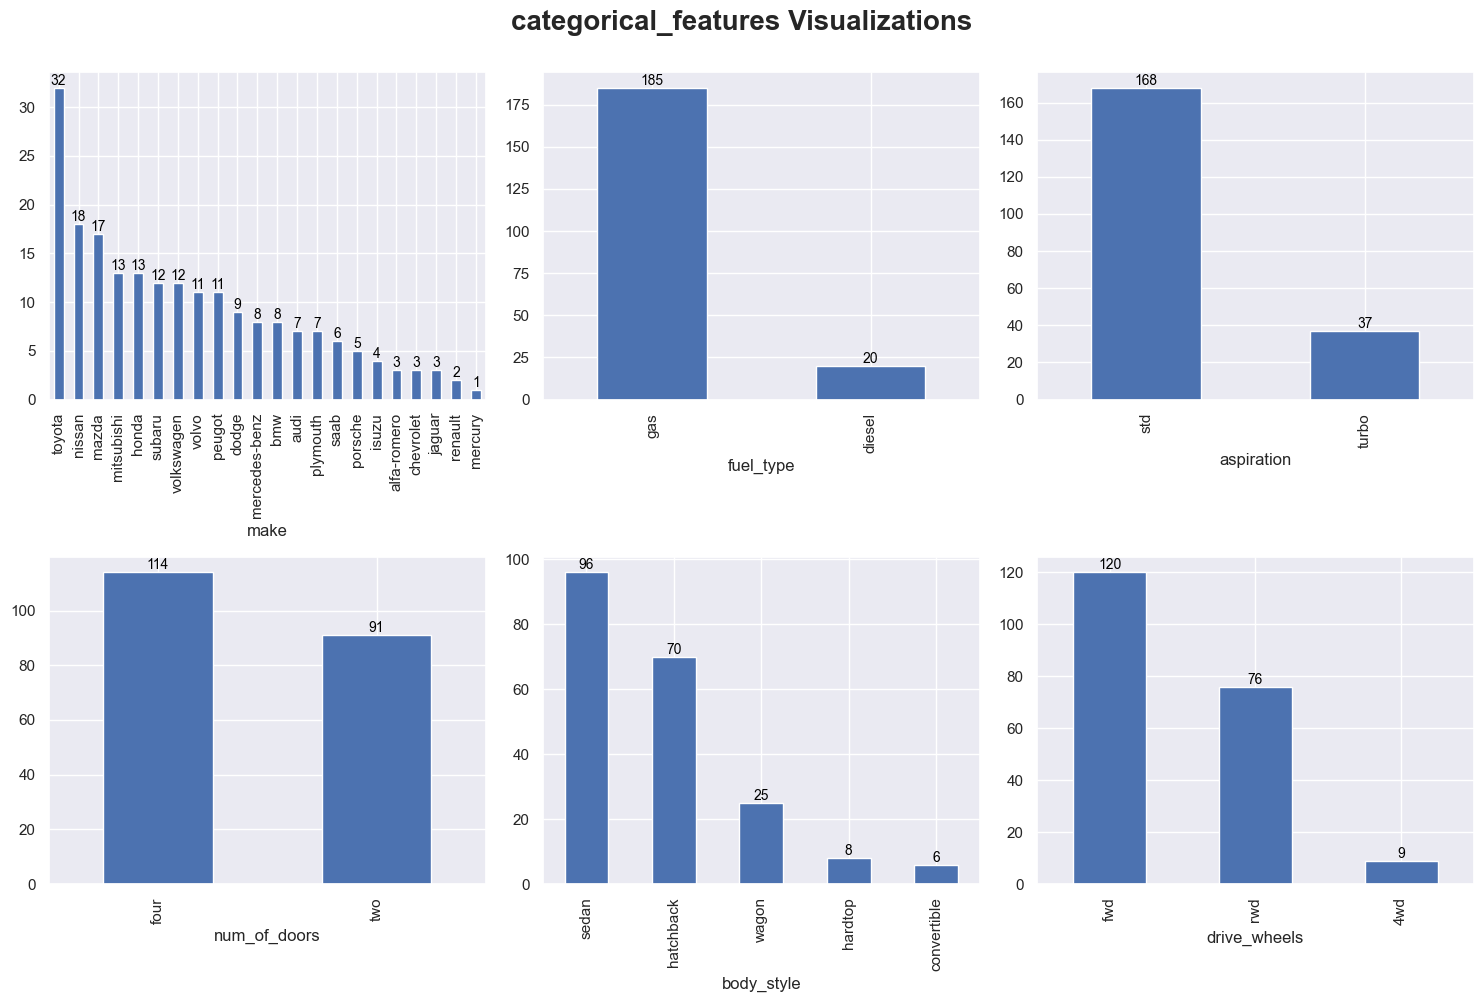

In [16]:
def plot_categorical_features(categorical_features):
    nrows = 2
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    fig.suptitle(f"categorical_features Visualizations",fontsize=20,fontweight="bold",y=1.)

    axes = axes.flatten()
    
    for i, column in enumerate(categorical_features.columns):
        if i >= nrows * ncols:
            break 
        ax = axes[i]
        counts = categorical_features[column].value_counts()
        counts.plot(kind='bar', ax=ax)
        
        for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )
        plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/CategoricalFeaturesGrapths/plot_Categorical_Features.png',dpi=500);
        
    plt.tight_layout()
    plt.show()

plot_categorical_features(categorical_features)  


*C. EDA Correlation*

* *As the data are not normally ditributed we will use spearman meathos*

In [19]:
numerical_features.corr(method="spearman")

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.399286,-0.537958,-0.396365,-0.253528,-0.523124,-0.256490,-0.176542,-0.159137,-0.026524,0.023008,-0.000412,0.283354,-0.018317,0.053316,-0.143367
normalized_losses,0.399286,1.000000,-0.058887,0.048138,0.085231,-0.303634,0.116508,0.090727,-0.010075,0.006399,-0.052341,0.194103,0.208210,-0.233669,-0.201605,0.159003
wheel_base,-0.537958,-0.058887,1.000000,0.912391,0.812300,0.632947,0.765291,0.648305,0.526845,0.227408,-0.126268,0.500887,-0.315440,-0.492849,-0.538680,0.667463
length,-0.396365,0.048138,0.912391,1.000000,0.888201,0.525148,0.890415,0.782616,0.626983,0.187487,-0.192663,0.653527,-0.262398,-0.670013,-0.697949,0.781738
width,-0.253528,0.085231,0.812300,0.888201,1.000000,0.350279,0.863815,0.770615,0.603069,0.236940,-0.145537,0.684431,-0.191472,-0.687690,-0.700999,0.774479
height,-0.523124,-0.303634,0.632947,0.525148,0.350279,1.000000,0.345852,0.199811,0.203544,-0.012723,0.000231,-0.001913,-0.300855,-0.068625,-0.132512,0.250627
curb_weight,-0.256490,0.116508,0.765291,0.890415,0.863815,0.345852,1.000000,0.877739,0.693290,0.160467,-0.219100,0.800519,-0.233245,-0.812947,-0.834385,0.875069
engine_size,-0.176542,0.090727,0.648305,0.782616,0.770615,0.199811,0.877739,1.000000,0.681940,0.294612,-0.234636,0.812538,-0.266785,-0.730056,-0.721342,0.792586
bore,-0.159137,-0.010075,0.526845,0.626983,0.603069,0.203544,0.693290,0.681940,1.000000,-0.099635,-0.151641,0.636542,-0.276772,-0.611370,-0.616720,0.612843
stroke,-0.026524,0.006399,0.227408,0.187487,0.236940,-0.012723,0.160467,0.294612,-0.099635,1.000000,-0.070907,0.122500,-0.059557,-0.022076,-0.022688,0.103545


* *Correlation -heatmap- price as target fetaure*

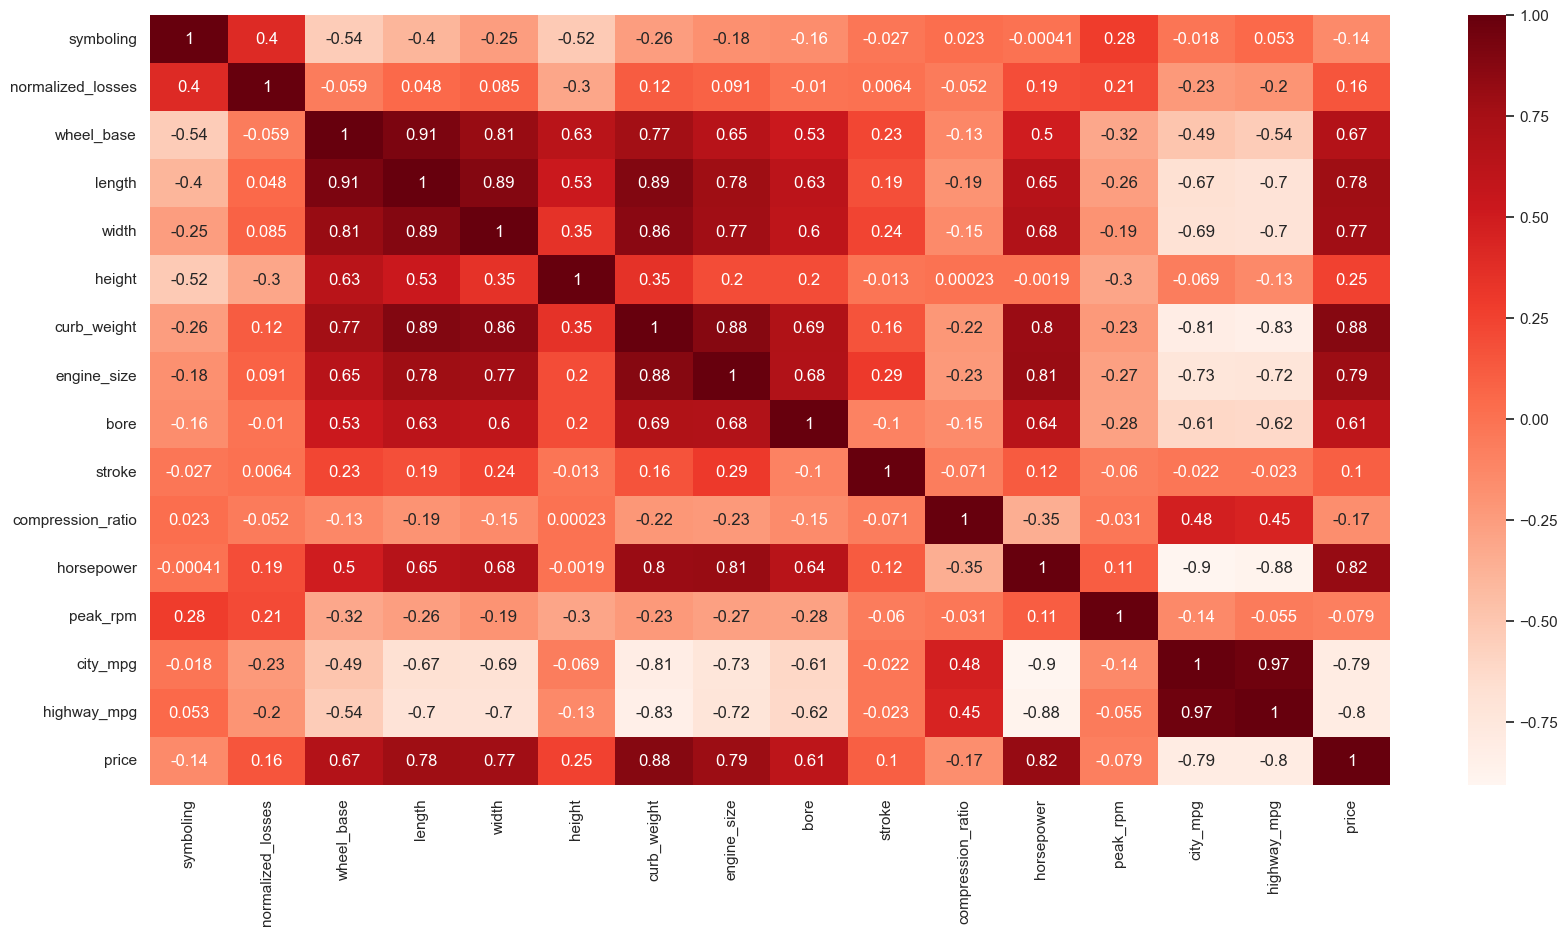

In [29]:
sns.heatmap(numerical_features.corr(method="spearman"),annot=True,cmap='Reds');
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/correlationGrapths/plot_correlation_Features.png',dpi=500);

* *Correlation -scatterplot- price as target fetaure*

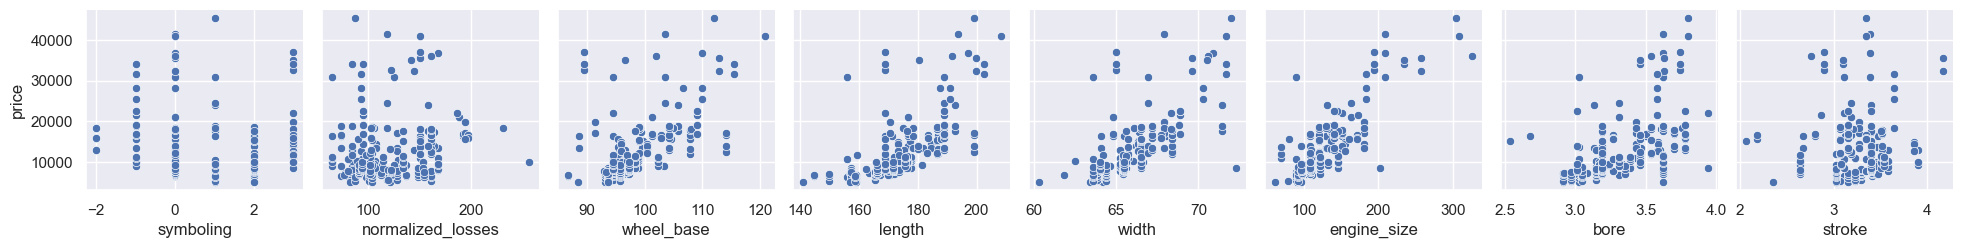

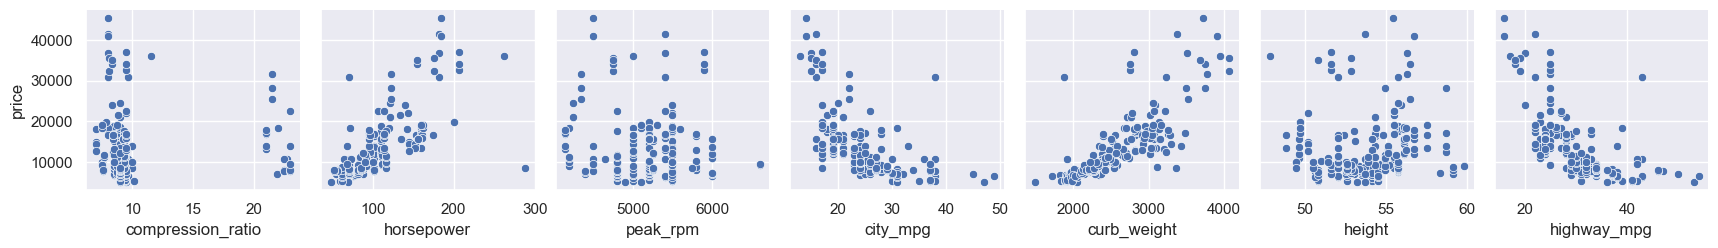

In [30]:
matplotlib.rcParams["figure.figsize"]=(20,10)
sns.pairplot(data=numerical_features,
             x_vars=['symboling', 'normalized_losses', 'wheel_base', 'length', 'width','engine_size', 'bore', 'stroke'],
             y_vars='price');
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/pointsplotGrapths/plot_pointsplot1_Features.png',dpi=500);

sns.pairplot(data=numerical_features,
             x_vars=['compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg','curb_weight','height','highway_mpg'],
             y_vars='price');
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/pointsplotGrapths/plot_pointsplot2_Features.png',dpi=500);

---

* *price mean by fuel_system*

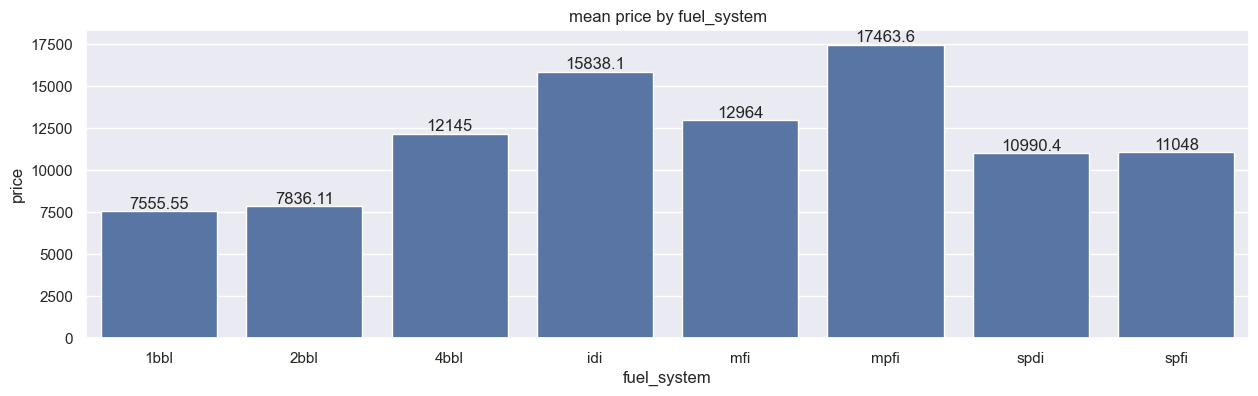

In [38]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("fuel_system")["price"].mean().to_frame(),x="fuel_system",y="price")
ax.set(title='mean price by fuel_system')
for i in ax.containers:
    ax.bar_label(i,);
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_fuel_system.png',dpi=500);

* *price mean by num_of_cylinders*

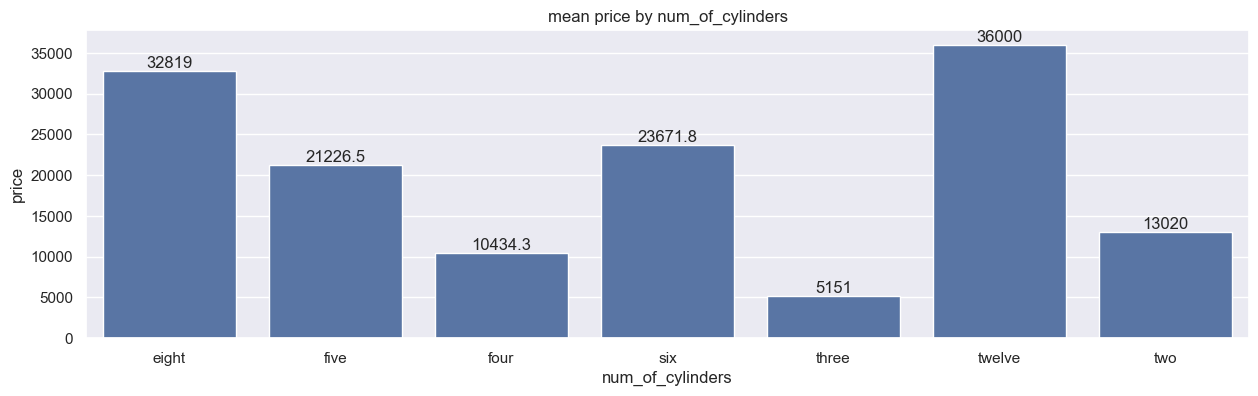

In [39]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("num_of_cylinders")["price"].mean().to_frame(),x="num_of_cylinders",y="price")
ax.set(title='mean price by num_of_cylinders')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_num_of_cylinders.png',dpi=500);    

* *price mean by engine_type*

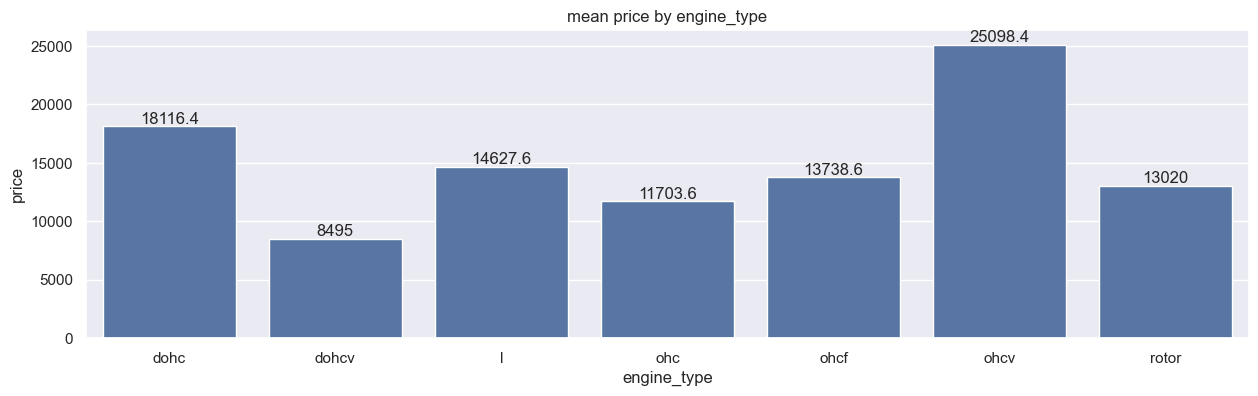

In [40]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("engine_type")["price"].mean().to_frame(),x="engine_type",y="price")
ax.set(title='mean price by engine_type')
for i in ax.containers:
    ax.bar_label(i,)
    plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_engine_type.png',dpi=500); 

* *price mean by engine_location*

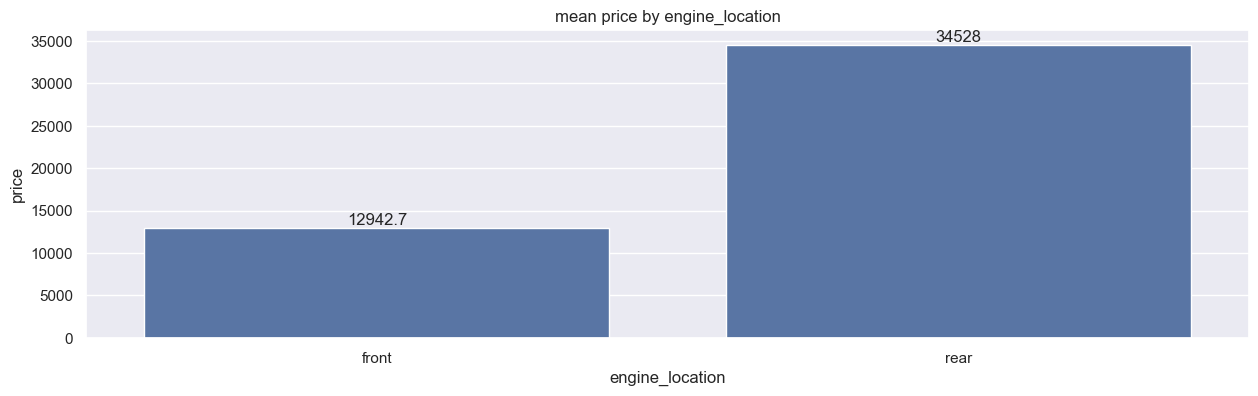

In [41]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("engine_location")["price"].mean().to_frame(),x="engine_location",y="price")
ax.set(title='mean price by engine_location')
for i in ax.containers:
    ax.bar_label(i,)
    plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_engine_location.png',dpi=500); 

* *price mean by drive_wheels*

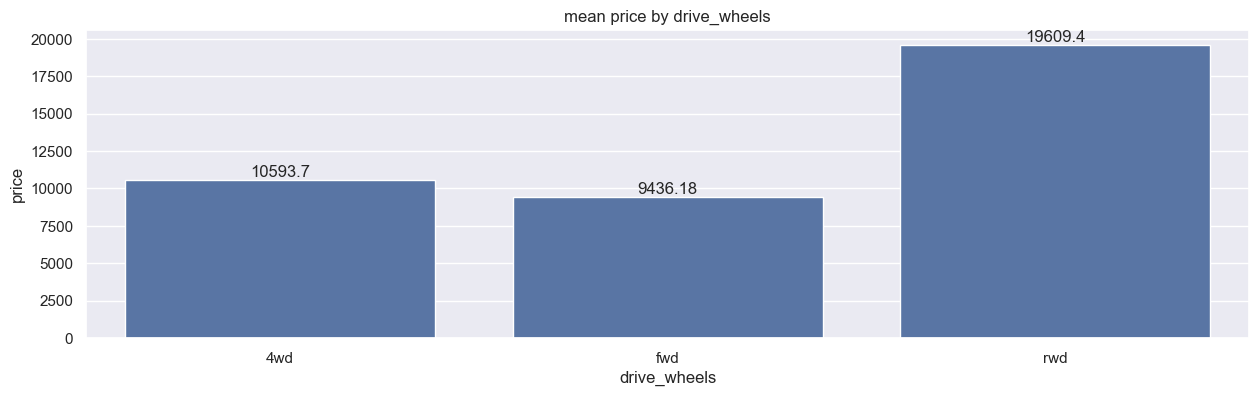

In [42]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("drive_wheels")["price"].mean().to_frame(),x="drive_wheels",y="price")
ax.set(title='mean price by drive_wheels')
for i in ax.containers:
    ax.bar_label(i,)
    plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_drive_wheels.png',dpi=500); 

* *price mean by body_style*

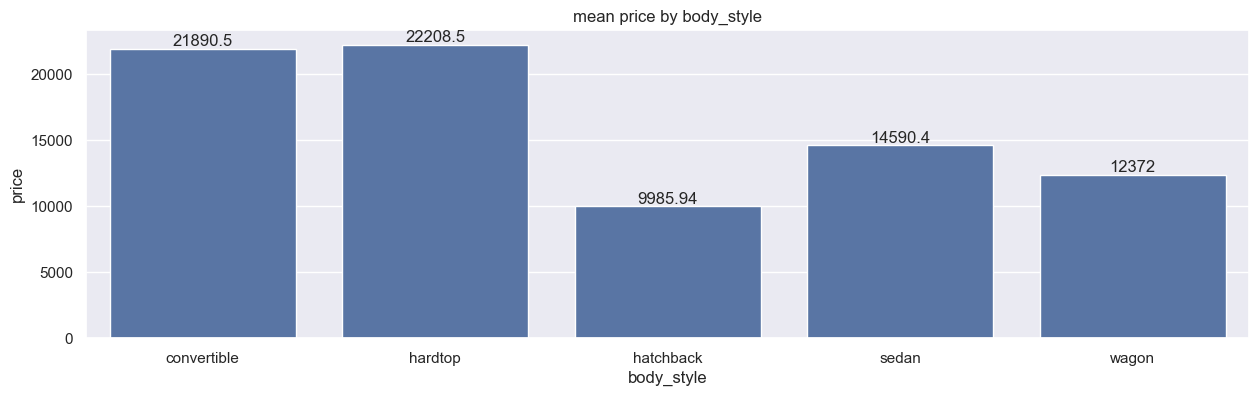

In [43]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("body_style")["price"].mean().to_frame(),x="body_style",y="price")
ax.set(title='mean price by body_style')
for i in ax.containers:
    ax.bar_label(i,)
    plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_body_style.png',dpi=500); 

* *price mean by num_of_doors*

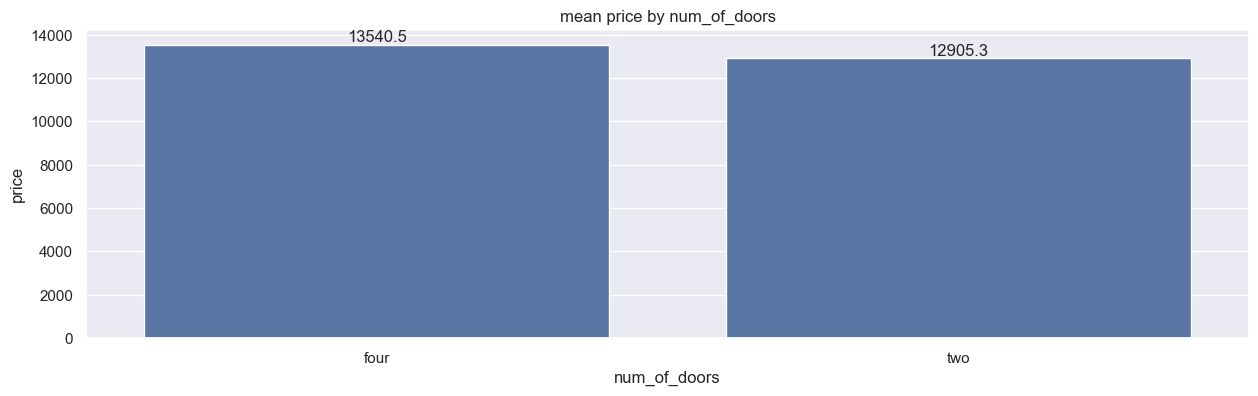

In [44]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("num_of_doors")["price"].mean().to_frame(),x="num_of_doors",y="price")
ax.set(title='mean price by num_of_doors')
for i in ax.containers:
    ax.bar_label(i,)
    plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_num_of_doors.png',dpi=500); 

* *price mean by aspiration*

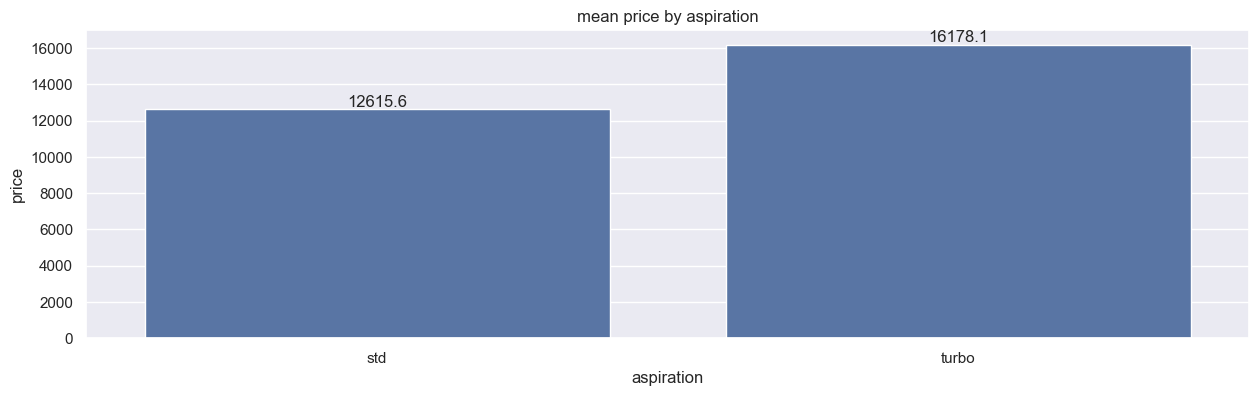

In [45]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("aspiration")["price"].mean().to_frame(),x="aspiration",y="price")
ax.set(title='mean price by aspiration')
for i in ax.containers:
    ax.bar_label(i,)
    plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_aspiration.png',dpi=500); 

* *price mean by fuel_type*

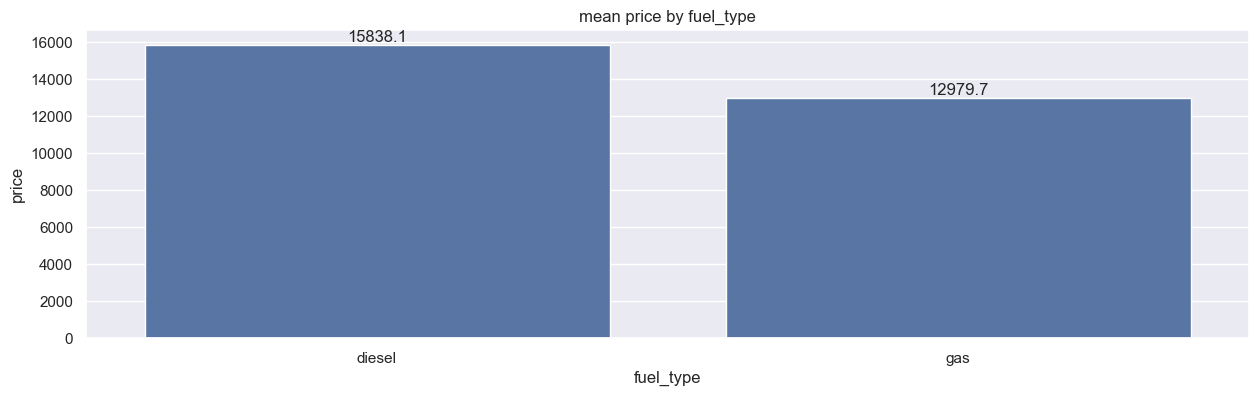

In [46]:
plt.subplots(figsize=(15, 4))
ax = sns.barplot(data=df.groupby("fuel_type")["price"].mean().to_frame(),x="fuel_type",y="price")
ax.set(title='mean price by fuel_type')
for i in ax.containers:
    ax.bar_label(i,)
    plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_fuel_type.png',dpi=500); 

* *price mean by make*

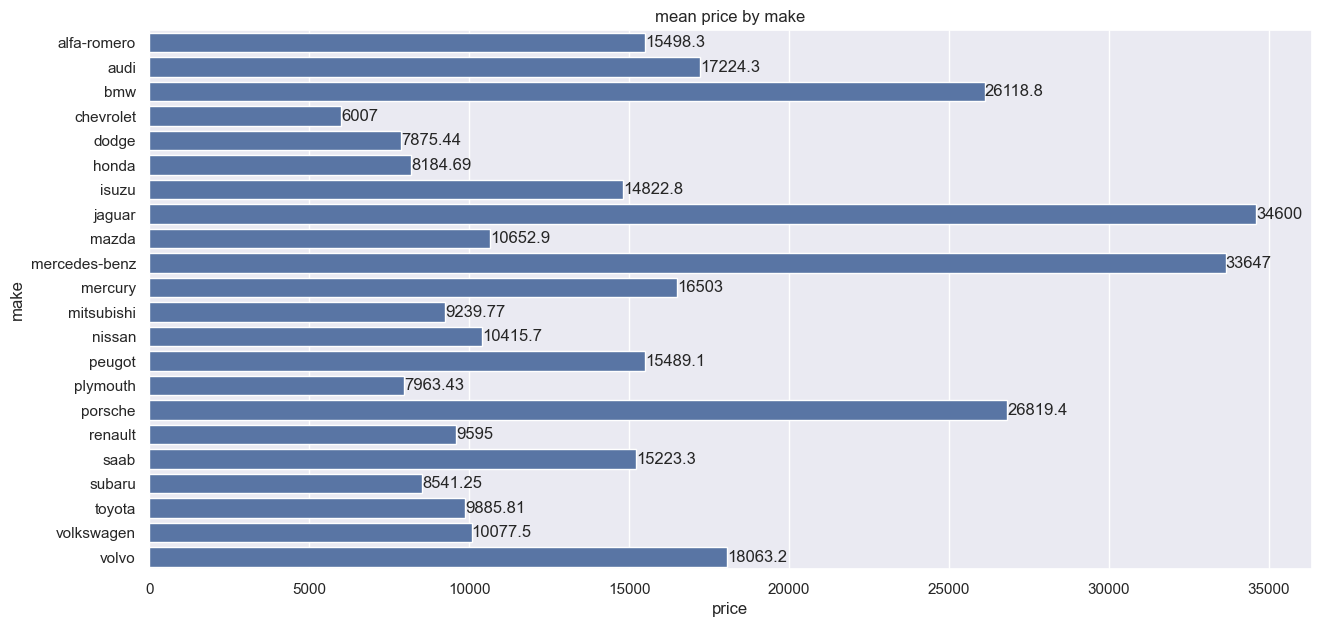

In [47]:
plt.subplots(figsize=(15, 7))
ax = sns.barplot(data=df.groupby("make")["price"].mean().to_frame(),y="make",x="price")
ax.set(title='mean price by make')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_make.png',dpi=500); 

---

* *Applying LabelEncoder for categorical features*

In [81]:
from sklearn.preprocessing import LabelEncoder
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

---

* *Defines skewness and fix it using PowerTransformer if needed*

In [82]:
discrete_feature=[feature for feature in numerical_features if  len(df[feature].unique())<=25]
countinuous_feature=[feature for feature in numerical_features if  len(df[feature].unique())>25]

In [83]:
print("we have {} discrete feature : {}\n".format(len(discrete_feature),(discrete_feature)))
print("we have {} countinuous feature : {}".format(len(countinuous_feature),(countinuous_feature)))

we have 2 discrete feature : ['symboling', 'peak_rpm']

we have 14 countinuous feature : ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'city_mpg', 'highway_mpg', 'price']


In [84]:
df[countinuous_feature].skew(axis=0,skipna=True)

normalized_losses    0.796916
wheel_base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb_weight          0.681398
engine_size          1.947655
bore                 0.020855
stroke              -0.675604
compression_ratio    2.610862
horsepower           1.402965
city_mpg             0.663704
highway_mpg          0.539997
price                1.817095
dtype: float64

---

* *Define x and y*

In [85]:
x=df.drop("price",axis=1)
y=df["price"]

---

* *Apply StandardScaler*

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

sc=StandardScaler()
preprocessor=ColumnTransformer([
    ("StandardScaler",sc,x.columns)
]
)

In [87]:
x=preprocessor.fit_transform(x)

---

* *Apply train_test_split*

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.2,random_state=42)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (164, 25) and Y = (164,) : 
Test data shape of X = (41, 25) and Y = (41,) : 


---

* *Modelling*

In [89]:

from sklearn.metrics import (
    root_mean_squared_error,r2_score
)

from sklearn.ensemble import (
    RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
)

from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb
from xgboost import XGBRFRegressor

from sklearn.linear_model import (
    LinearRegression,GammaRegressor,ElasticNet
)

from sklearn.model_selection import (
    train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
)

from sklearn.preprocessing import (
        LabelEncoder,StandardScaler,PowerTransformer,StandardScaler,OneHotEncoder,OrdinalEncoder
        )

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from tqdm import tqdm

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR


In [90]:
models = {
                "RandomForestRegressor": RandomForestRegressor(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "XGBRFRegressor": XGBRFRegressor(),
                "GradientBoostingRegressor":GradientBoostingRegressor(),
                "AdaBoostRegressor": AdaBoostRegressor(),
                "KNeighborsRegressor":KNeighborsRegressor(),
                "SVR":SVR(),
                "ElasticNet":ElasticNet(),
                "LinearRegression":LinearRegression()

}

In [91]:
def evaluation_preds(y_true,predicted):
    RMSE=root_mean_squared_error(y_true,predicted)
    return RMSE

In [121]:
def evalua_models(x_train,y_train,models):
    #x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.20,random_state=42)
    models_list=[]
    RMSE_list=[]
    for i in  range(len(list(models))):
        model=list(models.values())[i]
        model.fit(x_train,y_train)

        train_predicted=model.predict(x_train)
        test_predicted=model.predict(x_test)      
        
        test_predicted_RMSE=evaluation_preds(y_test,test_predicted)
        #=save_evaluation_preds(y_test,test_predicted)
       
        RMSE_list.append(test_predicted_RMSE)

        models_list.append(list(models.keys())[i])
        
    report=pd.DataFrame(list(zip(models_list,RMSE_list)),columns=["model","RMSE"]).sort_values(by="RMSE",ascending=True)
    return report

In [123]:
evalua_models(x_train,y_train,models)

,model,RMSE
0,RandomForestRegressor,2442.513346
3,GradientBoostingRegressor,2929.522664
2,XGBRFRegressor,3041.064226
1,DecisionTreeRegressor,3398.636742
4,AdaBoostRegressor,3412.642771
8,LinearRegression,3692.277380
7,ElasticNet,4151.668565
5,KNeighborsRegressor,4711.863134
6,SVR,9237.851610


In [124]:
np.random.seed(42)
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)

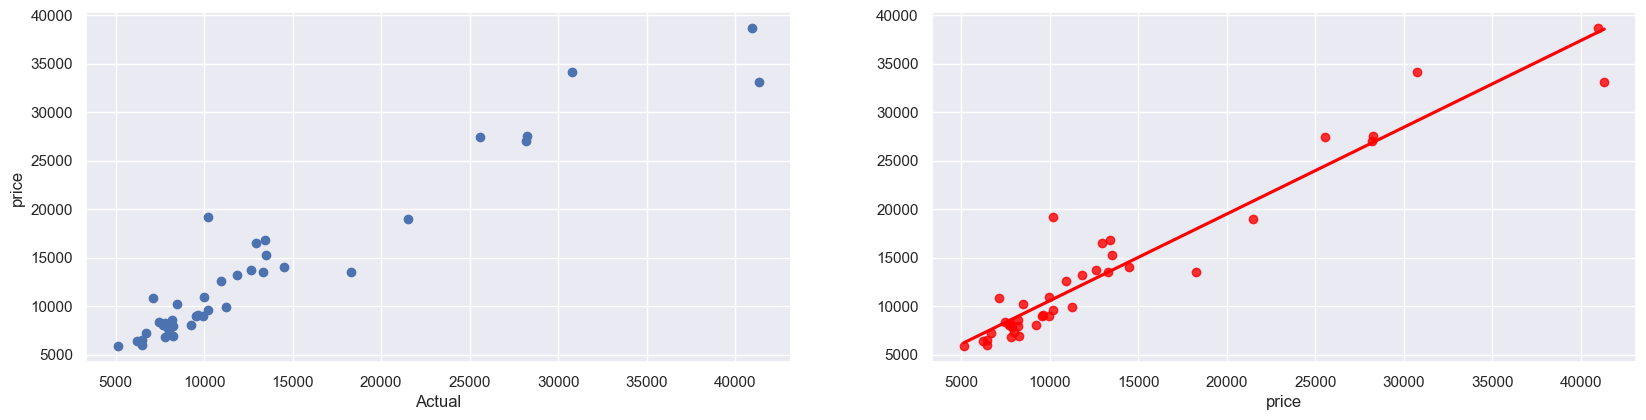

In [125]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/modelsEvaluationsGraphs/plot_BestModel_Residual.png',dpi=500); 

In [126]:
clf.feature_names=list(df.drop("price",axis=1).columns)
importance=pd.concat([pd.DataFrame(clf.feature_names,columns=["feature_names"]),
           pd.DataFrame(clf.feature_importances_,columns=["feature_importances"])],axis=1)
importance

,feature_names,feature_importances
0,symboling,0.000727
1,normalized_losses,0.012723
2,make,0.013490
3,fuel_type,0.000095
4,aspiration,0.001057
5,num_of_doors,0.000455
6,body_style,0.002152
7,drive_wheels,0.000811
8,engine_location,0.000306
9,wheel_base,0.007154


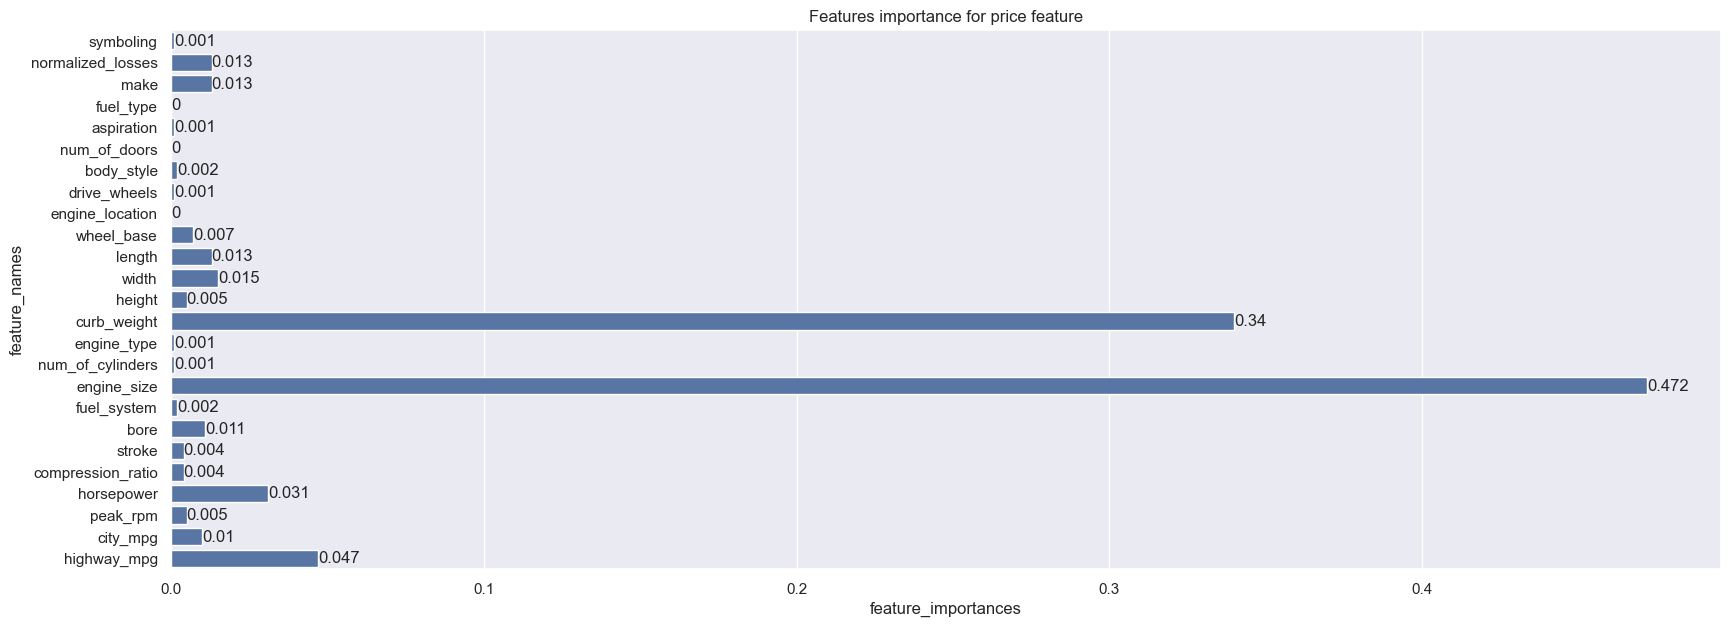

In [127]:
matplotlib.rcParams["figure.figsize"]=(20,7)
ax=sns.barplot(x=np.round(importance["feature_importances"],3),y=importance["feature_names"])
plt.title('Features importance for price feature')
ax.bar_label(ax.containers[0]);
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/featuresImportanceGraphs/price_featureImportanc.png',dpi=500); 

In [128]:
import pickle
with open ("C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/bestModel/price_prediction_model.pkl","wb") as f:
    pickle.dump(clf,f)

---